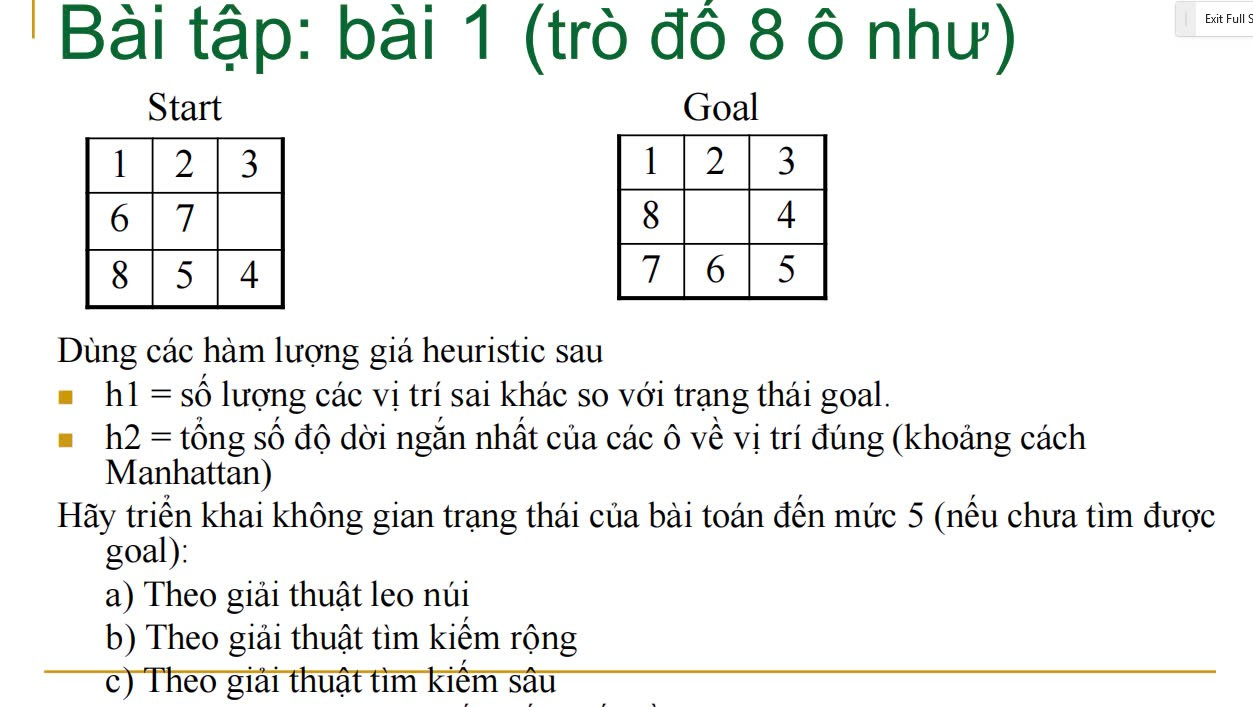

Hàm lượng giá : f(n) = g(n) + h(n)
* g(n): giá trị khoảng cách từ n đến điểm bắt đầu
* h(n): giá trị khoảng cách từ n đến đích

1.  Theo giải thuật leo núi (Hill Climbing)     
Thuật toán này dựa trên việc luôn chọn trạng thái con có giá trị heuristic tốt nhất (nhỏ nhất).     
Nếu không tìm được trạng thái con nào tốt hơn trạng thái hiện tại, thuật toán dừng lại. 

In [ ]:
def h1(state, goal):
    return sum(1 for i in range(len(state)) for j in range(len(state[0])) if state[i][j] != goal[i][j] and state[i][j] != 0)


## Yêu Cầu Bài Toán: Tìm Đường Đi Từ Điểm Bắt Đầu Đến Đích Sử Dụng Thuật Toán Best First Search
* Mô tả bài toán:
* Bạn có một ma trận 2D với các ô có thể là:
* 0: Ô trống (có thể di chuyển qua)
* 1: Ô chướng ngại vật (không thể di chuyển qua)
* Bạn cần tìm đường đi ngắn nhất từ một ô bắt đầu (start) đến ô đích (goal) bằng thuật toán Best First Search, sử dụng heuristic là khoảng cách Manhattan giữa các ô.
* Yêu cầu chi tiết:
* Input:
* Một ma trận 2D kích thước m×n, trong đó các ô có thể là:
* 0: ô trống (có thể di chuyển qua)
* 1: ô chướng ngại vật (không thể di chuyển qua)
* Vị trí của ô bắt đầu (start) và ô đích (goal).
* Output:
* Một danh sách các tọa độ của các ô mà bạn đi qua từ ô bắt đầu đến ô đích, theo thứ tự tìm được.
* Nếu không có đường đi, trả về "No Path Found".
* Heuristic (h): Sử dụng khoảng cách Manhattan giữa ô hiện tại và ô đích làm heuristic:
* h(n)=∣xcurrent​−xgoal​∣+∣ycurrent​−ygoal​∣
* Cách tính toán:
* Chi phí di chuyển: Vì Best First Search chỉ sử dụng heuristic mà không tính đến chi phí thực tế (g), mỗi lần di chuyển sang một ô kế tiếp có cùng chi phí (giả sử là 1).
* Các bước thực hiện:
* Sinh viên sẽ sử dụng hàng đợi ưu tiên (priority queue) để lưu trữ các điểm cần xét, được sắp xếp theo giá trị của heuristic h(n) (khoảng cách Manhattan từ điểm hiện tại đến đích).
* Sau mỗi lần di chuyển, thuật toán sẽ kiểm tra các ô xung quanh và chọn ô có giá trị heuristic nhỏ nhất để di chuyển tiếp.*

In [11]:
import heapq

def best_first_search(grid, start, goal):
    # Hướng di chuyển: lên, xuống, trái, phải
    directions = [(1, 0), (-1, 0), (0, -1), (0, 1)]
    
    # Hàm tính khoảng cách Manhattan
    def manhattan_distance(x1, y1, x2, y2):
        return abs(x1 - x2) + abs(y1 - y2)

  # Priority queue (hàng đợi ưu tiên) và tập hợp các điểm đã thăm
    priority_queue = []
    # (heuristic, tọa độ hiện tại)
    heapq.heappush(priority_queue, (manhattan_distance(*start, *goal), start))
    visited = set()
    visited.add(start)

    # Đường đi lưu lại các nút trước
    parent = {}
    parent[start] = None

    while priority_queue:
        _, current = heapq.heappop(priority_queue)
        cx, cy = current

        # Nếu đạt đến đích
        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            return path[::-1]  # Trả về đường đi từ start -> goal

        # Xét các nút kề
        for dx, dy in directions:
            nx, ny = cx + dx, cy + dy
            neighbor = (nx, ny)

            # Kiểm tra xem nút kề có hợp lệ không
            if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] == 0:
                if neighbor not in visited:
                    visited.add(neighbor)
                    parent[neighbor] = current
                    heuristic = manhattan_distance(nx, ny, goal[0], goal[1])
                    heapq.heappush(priority_queue, (heuristic, neighbor))

    # Nếu không tìm thấy đường đi
    return "No Path Found"




In [12]:
# Test ví dụ
grid = [
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0]
]
start = (0, 0)
goal = (2, 0)

path = best_first_search(grid, start, goal)
print("Đường đi:", path)


Đường đi: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (3, 3), (3, 2), (2, 2), (2, 1), (2, 0)]


In [2]:
# Hàm Minimax
def minimax(node, depth, is_maximizing_player, alpha, beta):
    # Nếu nút là nút lá, trả về giá trị
    if depth == 0 or node not in tree:
        return values[node]
    
    if is_maximizing_player:
        max_eval = float('-inf')
        for child in tree[node]:
            eval = minimax(child, depth - 1, False, alpha, beta)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:  # Cắt tỉa
                break
        return max_eval
    else:
        min_eval = float('inf')
        for child in tree[node]:
            eval = minimax(child, depth - 1, True, alpha, beta)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:  # Cắt tỉa
                break
        return min_eval

# Cây (dạng dictionary)
tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G', 'H'],
    'G': ['I', 'J', 'K', 'L'],
    'I': ['M', 'N']
}

# Giá trị tại các nút lá
values = {
    'D': 3, 'E': 5, 'F': 5, 'H': 4,
    'M': 0, 'N': 7, 'J': 5, 'K': 7, 'L': 8
}

# Tính toán Minimax với Alpha-Beta cắt tỉa
result = minimax('A', depth=5, is_maximizing_player=True, alpha=float('-inf'), beta=float('inf'))
print(f"Giá trị Minimax tại nút gốc A: {result}")


Giá trị Minimax tại nút gốc A: 4
